In [152]:

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

class NaiveBayes:
    def __init__(self,dataset):
        self.__dataset = dataset
        self.__classAttribute = list(self.__dataset.keys())[-1]
        self.__classes = list(set(self.__dataset[self.__classAttribute]))
        self.__attributes = list(self.__dataset.keys())[:-1]
        self.__classProbabilites = dict()
    
   
        
    def train(self):
        self.__classCounts = dict(Counter(self.__dataset[self.__classAttribute]))
        self.__featureProbabilites = {}
        self.__initClassProbabilities()
        self.__initFeatureProbabilites()
            
    
    def __initClassProbabilities(self):
        counts = dict(Counter(self.__dataset[self.__classAttribute]))
        totalNumberOfTuples = sum(counts.values())
        self.__classProbabilites = {key:self.__getProbability(counts[key],totalNumberOfTuples) for key in counts.keys()}
        
    
    

    def __initFeatureProbabilites(self):
        for attribute in self.__attributes:
            data = {}
            attributeCounts = len(self.__getAttributeValues(attribute))#for laplace correction
            for attributeValue in self.__getAttributeValues(attribute):
                probabilities = {}
                for classValue in self.__classes:
                    probability = self.__getProbability(1+self.__getCounts((attribute,attributeValue),(self.__classAttribute,classValue)),attributeCounts+self.__classCounts[classValue])
                    probabilities[classValue] = probability
                data[attributeValue] = probabilities
            self.__featureProbabilites[attribute] = data
        return self.__featureProbabilites
        
    def __getAttributeValues(self,attribute):
        return list(set(self.__dataset[attribute]))
    
    def getAttributes(self):
        return self.__attributes
                
    
    def __getCounts(self,tuple1,tuple2):
        return len(self.__dataset[(self.__dataset[tuple1[0]] == tuple1[1]) & (self.__dataset[tuple2[0]] == tuple2[1])])
        
    def __getProbability(self,n,N):
        return n/N

    def __getClassProbabilities(self):
        return self.__classProbabilites
    
    def getClassProbabilities(self):
        return self.__classProbabilites
    
    def __getFeatureProbabilities(self):
        return self.__featureProbabilites
    
    def getClassProbabilities(self):
        
        return self.__classProbabilites
    
    def getFeatureProbabilities(self):
        return self.__featureProbabilites
    
    def predict(self,featureDictionary):
        probabilitesOfClasses = []
        for classValue in self.__classes:
            probability = 1
            for key,value in featureDictionary.items():
                probability*= self.__featureProbabilites[key][value][classValue]
            
            probability *=self.__classProbabilites[classValue]
        
            probabilitesOfClasses.append(probability)
        
        return self.__classes[np.argmax(probabilitesOfClasses)]
    



In [164]:
class NaiveBayesTest:
    
    def __init__(self,dataset):
        self.__dataset = dataset
        
    def getDataDictionary(self,classifierHere,data):
        dictionary = {}
        for key,value in zip(classifierHere.getAttributes(),data):
            dictionary[key] = value
    
        return dictionary
        
    def verifier(self,x,y):
        return x == y

    def test(self,data):
        predictions = []
        trueClasses = data['class']
        for i in range(len(data)):
            features = getDataDictionary(classifier,list(dict(data.iloc[i]).values())[:-1])
            predictions.append(classifier.predict(features))
        accurates = 0
        for prediction,trueValue in zip(predictions,trueClasses):
            if verifier(prediction,trueValue):
                accurates+=1
        return predictions,100*(accurates/len(data))
    
    
    def crossValidatation(self,k):
        size = len(self.__dataset)//k
        accuracies = []
        for i in range(k):
            dataframe_copy = self.__dataset.copy()
            train,testData = dataframe_copy.drop(dataframe_copy.index[i*size:(i*size)+size+1]),self.__dataset.iloc[i*size:(i*size)+size+1]
            testClassifier = NaiveBayes(train)
            accuracies.append(self.test(testData)[1])
        return accuracies,sum(accuracies)/k
    
    def predictedDistribution(self):
        return self.test(self.__dataset)[0]
        
    
        
   
    
            

In [207]:
def plotBar(dataX,dataY,xlabel,ylabel,title):
    plt.bar(dataX,dataY)
    plt.xlabel=xlabel
    plt.ylabel=ylabel
    plt.title= title
    plt.show()

In [208]:
data = pd.read_csv('../datasets/balance.data',sep=',')
columns = ['class','left-weight','left-distance','right-weight','right-distance']
data.columns = columns
newColumn = ['left-weight','left-distance','right-weight','right-distance','class']
data = data[newColumn]

In [209]:
Test = NaiveBayesTest(data)


In [210]:
accuracies,average = Test.crossValidatation(10) #10 folds used

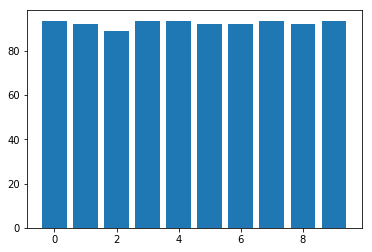

In [211]:
plotBar(list(range(0,len(accuracies),1)),accuracies,"fold","Accuracy","Accuracy Plot for cross validation")


In [212]:
Classifer = NaiveBayes(data)

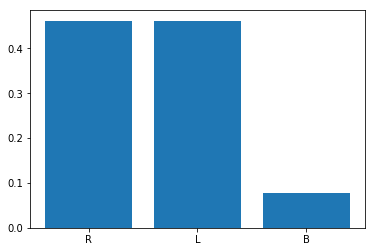

In [213]:
Classifer.train()
distribution = dict(Classifer.getClassProbabilities())
k,v = list(distribution.keys()),list(distribution.values())
plotBar(k,v,"class","probability","Probability Distribution")


In [214]:
testOnTraining = Test.predictedDistribution()

<BarContainer object of 2 artists>

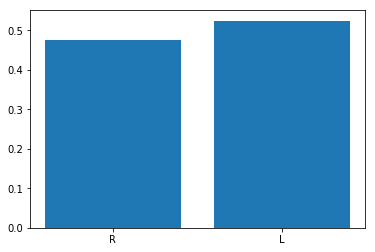

In [215]:
from collections import Counter
total = sum(Counter(testOnTraining).values())
distribution = {key:value/total for key,value in Counter(testOnTraining).items()}
k,v = list(distribution.keys()),list(distribution.values())
plt.bar(k,v)